In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
Y = pd.read_csv("C:\\Users\\AK\\Downloads\\unsupervised_data.csv")
Y.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,1,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,2,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,3,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,4,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,5,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015


In [20]:
X = Y.iloc[:,1:]
X = X.values
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [21]:
def pca(x, num_components):
    x_mean = x - x.mean(axis=0)
    cov_matrix = np.cov(x_mean, rowvar=False)
    eigenval, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenval)[::-1]
    max_eigen_vectors = eigenvectors[:,sorted_indices[:num_components]]
    projected_value = np.dot(x_mean, max_eigen_vectors)
    return projected_value

In [22]:
X_pca = pca(X, 2)

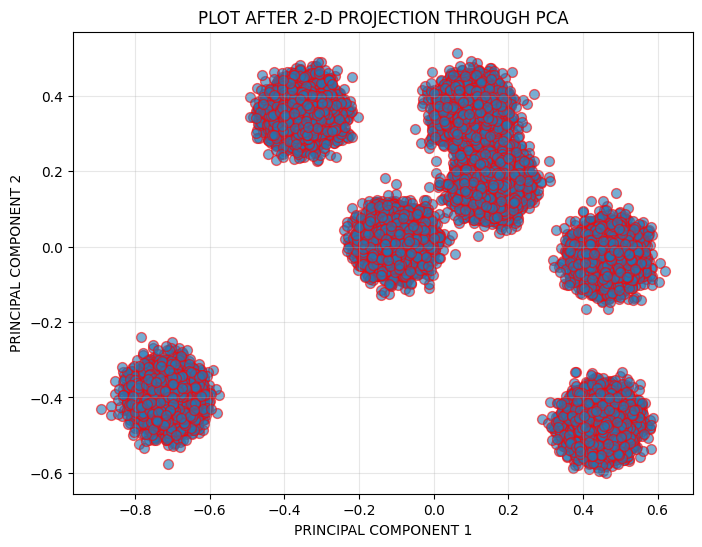

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=50, alpha=0.6, edgecolor='red')
plt.title("PLOT AFTER 2-D PROJECTION THROUGH PCA")
plt.xlabel("PRINCIPAL COMPONENT 1")
plt.ylabel("PRINCIPAL COMPONENT 2")
plt.grid(alpha=0.3)
plt.show()

In [24]:
def kmeans(x, k, tol=1e-8, iterations=100):
    np.random.seed(42)
    centroids = x[np.random.choice(x.shape[0], k, replace=False)]
    for i in range(iterations):
        distances = np.linalg.norm(x[:,np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([x[labels == m].mean(axis=0) for m in range(k)])
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids

In [25]:
def cost_function(x, labels, centroids):
    return sum(np.linalg.norm(x[labels == i] - centroid, axis=1).sum() for i, centroid in enumerate(centroids))

In [26]:
def plot_elbow_diagram(x):
    k_values = range(1, 10)
    cost_history = []
    for k in k_values:
        labels, centroids = kmeans(x, k)
        cost = cost_function(x, labels, centroids)
        cost_history.append(cost)
    plt.figure(figsize=(8,6))
    plt.plot(k_values, cost_history, linestyle='--', marker='o', color='blue')
    plt.title("ELBOW CURVE (K VS COST)")
    plt.xlabel("K VALUES")
    plt.ylabel("COST :)")
    plt.grid(alpha=0.3)
    plt.show()

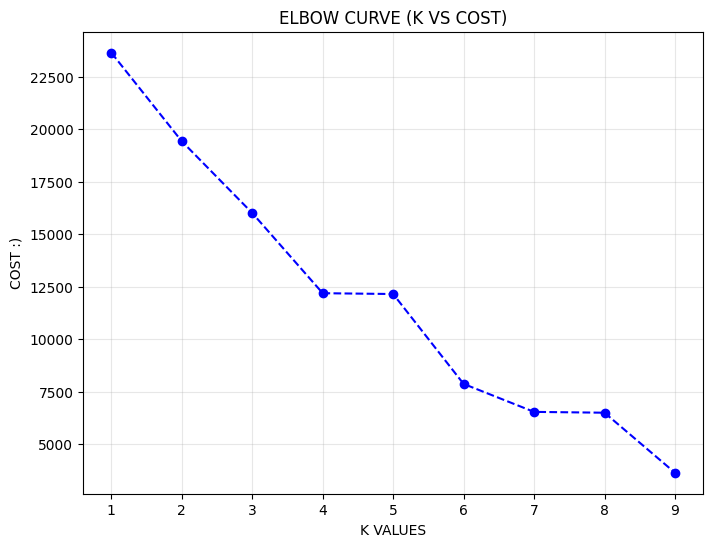

In [27]:
plot_elbow_diagram(X)

In [28]:
best_k = 4

In [29]:
labels, centroids = kmeans(X, best_k)
labels

array([2, 3, 0, ..., 3, 1, 3], dtype=int64)

In [30]:
unique, counts = np.unique(labels, return_counts=True)
counts

array([ 5715, 11426, 11430, 11429], dtype=int64)

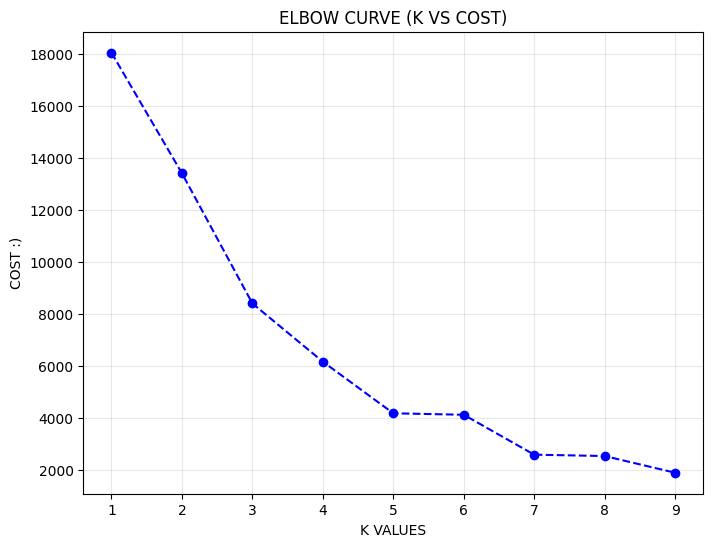

In [31]:
plot_elbow_diagram(X_pca)

In [32]:
best_k1 =  5

In [33]:
labels1, centroids1 = kmeans(X_pca, best_k1)

In [34]:
def plot_clusters(x, labels, centroids, k):
    plt.figure(figsize=(8, 6))
    for i in range(k):
        cluster_points = x[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}", alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title("K-means Clustering (PCA Reduced Data)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

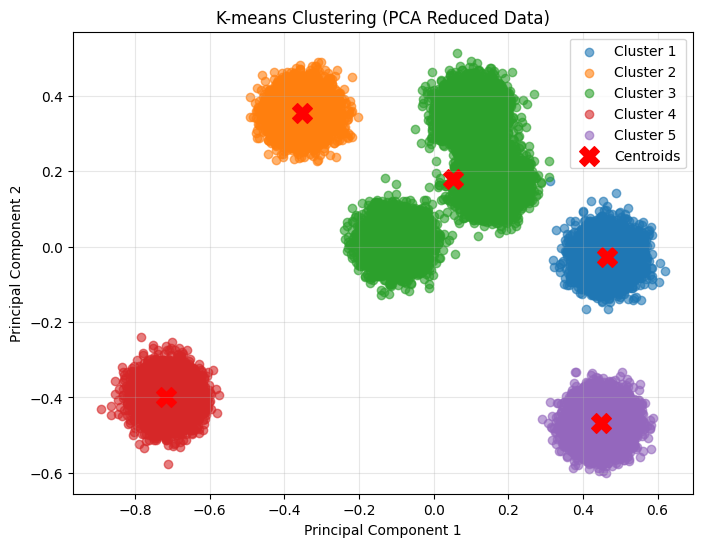

In [35]:
plot_clusters(X_pca, labels1, centroids1, best_k1)

In [ ]:
X_ = pd.DataFrame(Y)
labels_prediction = pd.DataFrame(labels)
X_['LABEL PREDICTED'] = labels_prediction
X_.to_csv("UNSUPERVISED_DATA_LABEL_PREDICTION.csv")